# Trabajo de Fin de Grado

### Impacto del perfil de los clientes y meteorología en la demanda de productos en hoteles: Un análisis de sensibilidad.

Trabajo realizado por Jesús Arencibia Falcón.

Este Trabajo de Fin de Grado se centra en analizar el impacto sobre la
 demanda de productos alimenticios dentro de hoteles, que tienen tanto las
 características del perfil de los clientes como las condiciones meteorológicas. El
 objetivo principal se basa en desarrollar un sistema de análisis de sensibilidad
 que ayude a entender estas relaciones en los datos. Y que permita mejorar
 la gestión hotelera, optimizando la planificación de compras y la eficiencia
 operativa en el sector.
 Para llevar esto a cabo, se ha diseñado un pipeline de datos automatizado
 que extrae información desde los sistemas de gestión hotelera (PMS) de Noray
 y desde APIs meteorológicas. Además, se han aplicado procesos de limpieza,
 normalización y estructuración de los datos. Con el propósito de entrenar
 modelos de aprendizaje automático capaces de cuantificar la influencia de las
 variables sobre el objetivo.
 Por lo tanto, este sistema busca aportar a los hoteles una herramienta de
 apoyo para la toma de decisiones estratégicas, adaptándose de forma dinámi
ca tanto a las características de los huéspedes como a las condiciones meteorológicas externas.

## Desarrollo del Código

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

## Extracción y transformación de datos de API de Noray.

In [ ]:
# Obtener un token de acceso.
token_url = "https://login.microsoftonline.com/29be0b6f-4f38-488a-83ce-07aa0512fe19/oauth2/v2.0/token"
client_id = "#Cliente autentificado en Noray"
client_secret = "#Contraseña de acceso del usuario"
scope = "https://api.businesscentral.dynamics.com/.default"


tenant = "29be0b6f-4f38-488a-83ce-07aa0512fe19"
enviroment_name = "Noraybolico"
api_version = "v1.0"
api_bc = "v2.0"
company_id = "6c1c99bd-be14-ed11-90eb-000d3a29b954"
api_publisher = "noray"
var_booking = "booking"
var_sales = "sales"
var_invoicing = "invoicing"

token_data = {
    "grant_type": "client_credentials",
    "client_id": client_id,
    "client_secret": client_secret,
    "scope": scope
}

token_response = requests.post(token_url, data=token_data)
token = token_response.json().get("access_token")


In [ ]:
hotel_id = "be0d34ec-3dfb-ed11-884a-002248845b01"
company_id = hotel_id

In [ ]:
base_url = f"https://api.businesscentral.dynamics.com/v2.0/{tenant}/{enviroment_name}/api/{api_publisher}/{var_booking}/{api_version}/companies({company_id})/bookings?$filter=(bookingStatus eq 'Occupancy' or bookingStatus eq 'Checkout')"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

all_records = []

url = base_url
while url:
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        
        all_records.extend(data.get('value', []))
        
        url = data.get('@odata.nextLink', None)
    else:
        print(f"Error al obtener datos: {response.text}")
        break

df_booking = pd.DataFrame(all_records)

df_booking.tail()

,@odata.etag,systemId,no,bookingDate,arrivalDate,arrivalTime,departureDate,departureTime,checkInDate,checkInTime,...,onlineChannelIDBooking,onlineChannelIDRoom,onlineBookingModifdate,onlineBookingModifTime,onlineBookingCancelDate,onlineBookingCancelTime,onlineBookingPaymentNo,onlineBookingServiceNo,lastModifiedDateTime,secretCode
14956,"W/""JzE5OzY1NTAxMzYwMTcxNDc0MTEwNDgxOzAwOyc=""",c5891c2c-2000-f011-9346-000d3ab6682e,SG-RH2501910,2025-03-13,2025-03-14,14:00:00,2025-03-16,12:00:00,2025-03-14,12:36:24.393,...,,988355,2025-03-13,12:00:00,0001-01-01,00:00:00,1,0,2025-03-16T10:28:34.257Z,
14957,"W/""JzIwOzExMjY1MjMwMzYyNDM2MTM1NjcxMTswMDsn""",99edaed0-c900-f011-9346-000d3ab6682e,SG-RH2501926,2025-03-14,2025-03-15,14:00:00,2025-03-25,12:00:00,2025-03-15,20:45:07.417,...,,988588,2025-03-14,11:55:20,0001-01-01,00:00:00,1,0,2025-03-16T13:55:51.033Z,
14958,"W/""JzE5Ozc0MTYzNzM2MjI5MTc5OTkwNjMxOzAwOyc=""",78ea20d3-9402-f011-9346-000d3ab6682e,SG-RH2501964,2025-03-16,2025-03-16,14:00:00,2025-03-23,12:00:00,2025-03-16,18:40:02.24,...,,989417,2025-03-16,12:00:00,0001-01-01,00:00:00,1,0,2025-03-17T17:56:27.393Z,
14959,"W/""JzE5OzkwMTY1MTcyNjUwODMxMzU1ODIxOzAwOyc=""",8b9a4673-fc03-f011-9346-000d3ab6682e,SG-RH2502000,2025-03-18,2025-03-20,14:00:00,2025-03-27,12:00:00,2025-03-20,16:16:25.923,...,,990082,2025-03-18,01:13:52,0001-01-01,00:00:00,1,0,2025-03-21T13:13:09.07Z,
14960,"W/""JzE4OzQxNzA5NTU4OTY2ODQ3NjQ4NTE7MDA7Jw==""",5cda05a6-f104-f011-9346-000d3ab6682e,SG-RH2502041,2025-03-19,2025-03-19,00:00:00,2025-03-20,00:00:00,2025-03-19,19:25:03.407,...,,990553,2025-03-19,19:16:58.603,0001-01-01,00:00:00,3,0,2025-03-20T13:02:28.657Z,


In [377]:
df_booking = df_booking[['no', 'arrivalDate', 'departureDate', 'nights',
       'allotmentNo', 'assignedRoomType', 'adults', 'adultsInExtraBed',
       'children', 'babies', 'boardBasis', 'postCode', 'countryRegion', 'stayTotalAmount', 'onlineBooking']]

### Convertir a datos diario

In [378]:
df_booking['arrivalDate'] = pd.to_datetime(df_booking['arrivalDate'])
df_booking['departureDate'] = pd.to_datetime(df_booking['departureDate'])

days_data = []

for index, row in df_booking.iterrows():
    stay_dates = pd.date_range(row['arrivalDate'], row['departureDate'] - pd.Timedelta(days=1), freq='D')
    
    for stay_date in stay_dates:
        days_data.append({
            'date': stay_date,
            'adults': row['adults'],
            'children': row['children'],
            'babies': row['babies'],
            'stayTotalAmount': row['stayTotalAmount'],
            'countryRegion': row['countryRegion'],
            'assignedRoomType': row['assignedRoomType'],
            'boardBasis': row['boardBasis'],
        })

df_daily = pd.DataFrame(days_data)

df_daily

,date,adults,children,babies,stayTotalAmount,countryRegion,assignedRoomType,boardBasis
0,2020-09-30,2,0,0,675.04,ESP,BUN1,SA
1,2020-10-01,2,0,0,675.04,ESP,BUN1,SA
2,2020-10-02,2,0,0,675.04,ESP,BUN1,SA
3,2020-10-03,2,0,0,675.04,ESP,BUN1,SA
4,2020-10-04,2,0,0,675.04,ESP,BUN1,SA
...,...,...,...,...,...,...,...,...
155814,2025-03-23,1,0,0,951.16,GBR,BUN1SU,SA
155815,2025-03-24,1,0,0,951.16,GBR,BUN1SU,SA
155816,2025-03-25,1,0,0,951.16,GBR,BUN1SU,SA
155817,2025-03-26,1,0,0,951.16,GBR,BUN1SU,SA


### Seleccionar variables mas relevantes: Países con más influencia de huéspedes.

Usando regla del 80/20.

In [379]:
df_daily['countryRegion'].unique()

array(['ESP', 'CHE', 'GBR', 'DEU', 'FRA', 'AUT', 'BEL', 'ITA', 'NOR',
       'IRL', 'NLD', 'POL', 'DNK', 'SVK', 'COL', 'RUS', 'SWE', 'USA',
       'URY', 'ROU', 'SRB', 'SVN', 'CZE', 'FIN', 'EST', 'ATF', 'VEN',
       'BRA', 'MAR', 'HUN', 'CUB', 'ISL', 'PHL', 'PRT', 'ARG', 'ECU',
       'PER', 'CHL', 'HRV', 'MDA', 'LVA', 'ES', 'BOL', 'IRN', 'AUS',
       'JAM', 'GRC', 'CHN', 'ESH', 'NZL', 'LTU', 'KOS', 'UKR', 'ISR',
       'PRY', 'PAK', 'BR', 'MLT', 'TUR', 'BGR', 'MYS', 'THA', 'MKD',
       'AND', 'MLI', 'DZA', 'JPN', 'IND', 'MEX', 'CRI', 'BRI', 'GNB',
       'BIH', 'CAN', 'ARM', 'ASM', 'NPL'], dtype=object)

In [ ]:
country_counts = df_daily['countryRegion'].value_counts()

cumulative_percentage = country_counts.cumsum() / country_counts.sum()

top_80_countries = cumulative_percentage[cumulative_percentage <= 0.8].index

df_daily2 = df_daily[df_daily['countryRegion'].isin(top_80_countries)]

In [ ]:
df_daily_summary = df_daily2.groupby('date').agg({
    'adults': 'sum',
    'children': 'sum',
    'babies': 'sum',
}).reset_index()

for country in df_daily2['countryRegion'].unique():
    country_total = df_daily2[df_daily2['countryRegion'] == country].groupby('date').agg({
        'adults': 'sum',
        'children': 'sum',
        'babies': 'sum'
    }).sum(axis=1).reset_index(name=f'people_{country}')
    
    df_daily_summary = df_daily_summary.merge(country_total, on='date', how='left')


df_daily_summary = df_daily_summary.fillna(0)

person_columns = ['adults', 'children', 'babies'] + [col for col in df_daily_summary.columns if col.startswith('people_')]
df_daily_summary[person_columns] = df_daily_summary[person_columns].astype(int)


df_daily_summary

,date,adults,children,babies,people_ESP,people_CHE,people_GBR,people_DEU,people_FRA,people_AUT,people_BEL,people_ITA,people_NOR,people_IRL,people_NLD,people_DNK,people_SWE
0,2020-09-30,33,0,1,18,3,2,11,0,0,0,0,0,0,0,0,0
1,2020-10-01,38,1,1,24,3,2,11,0,0,0,0,0,0,0,0,0
2,2020-10-02,79,5,1,69,3,2,11,0,0,0,0,0,0,0,0,0
3,2020-10-03,98,6,1,85,3,2,11,0,2,2,0,0,0,0,0,0
4,2020-10-04,40,4,1,31,1,0,9,0,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,2025-05-03,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1677,2025-05-04,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1678,2025-05-05,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
1679,2025-05-06,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0


### Añadir información adiccional al estudio.

In [ ]:
def obtener_temporada(fecha):
    mes = fecha.month
    dia = fecha.day

    if (mes == 12 and dia >= 21) or (1 <= mes <= 2) or (mes == 3 and dia < 20):
        return 'Invierno'
    elif (mes == 3 and dia >= 20) or (4 <= mes <= 5) or (mes == 6 and dia < 21):
        return 'Primavera'
    elif (mes == 6 and dia >= 21) or (7 <= mes <= 8) or (mes == 9 and dia < 22):
        return 'Verano'
    else:
        return 'Otoño'

df_daily_summary['temporada'] = df_daily_summary['date'].apply(obtener_temporada)

df_daily_summary['temporada'] = df_daily_summary['temporada'].astype('category')
df_daily_summary['temporada']

0           Otoño
1           Otoño
2           Otoño
3           Otoño
4           Otoño
          ...    
1676    Primavera
1677    Primavera
1678    Primavera
1679    Primavera
1680    Primavera
Name: temporada, Length: 1681, dtype: category
Categories (4, object): ['Invierno', 'Otoño', 'Primavera', 'Verano']

In [383]:
df_daily_summary['nombre_dia'] = df_daily_summary['date'].dt.day_name() 

df_daily_summary['nombre_dia']

0       Wednesday
1        Thursday
2          Friday
3        Saturday
4          Sunday
          ...    
1676     Saturday
1677       Sunday
1678       Monday
1679      Tuesday
1680    Wednesday
Name: nombre_dia, Length: 1681, dtype: object

In [384]:
df_daily_summary = pd.get_dummies(df_daily_summary)
df_daily_summary

,date,adults,children,babies,people_ESP,people_CHE,people_GBR,people_DEU,people_FRA,people_AUT,...,temporada_Otoño,temporada_Primavera,temporada_Verano,nombre_dia_Friday,nombre_dia_Monday,nombre_dia_Saturday,nombre_dia_Sunday,nombre_dia_Thursday,nombre_dia_Tuesday,nombre_dia_Wednesday
0,2020-09-30,33,0,1,18,3,2,11,0,0,...,True,False,False,False,False,False,False,False,False,True
1,2020-10-01,38,1,1,24,3,2,11,0,0,...,True,False,False,False,False,False,False,True,False,False
2,2020-10-02,79,5,1,69,3,2,11,0,0,...,True,False,False,True,False,False,False,False,False,False
3,2020-10-03,98,6,1,85,3,2,11,0,2,...,True,False,False,False,False,True,False,False,False,False
4,2020-10-04,40,4,1,31,1,0,9,0,2,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,2025-05-03,2,0,0,0,0,0,0,0,2,...,False,True,False,False,False,True,False,False,False,False
1677,2025-05-04,2,0,0,0,0,0,0,0,2,...,False,True,False,False,False,False,True,False,False,False
1678,2025-05-05,2,0,0,0,0,0,0,0,2,...,False,True,False,False,True,False,False,False,False,False
1679,2025-05-06,2,0,0,0,0,0,0,0,2,...,False,True,False,False,False,False,False,False,True,False


## Extración y transformación de Datos AEMET Clima

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta, timezone

API_KEY = "#APi_Key de Aemet"

BASE_URL = "https://opendata.aemet.es/opendata/api/valores/climatologicos/diarios/datos/fechaini/{}/fechafin/{}/estacion/{}"

fecha_inicio = datetime(2020, 1, 1, tzinfo=timezone.utc)
fecha_fin = datetime.now(timezone.utc)

ESTACION_ID = "C649I"

todos_los_datos = []

def obtener_datos(api_key, fecha_ini, fecha_fin, estacion_id):
    url = BASE_URL.format(fecha_ini.strftime("%Y-%m-%dT00:00:00UTC"),
                          fecha_fin.strftime("%Y-%m-%dT23:59:59UTC"),
                          estacion_id)
    headers = {"accept": "application/json"}
    params = {"api_key": api_key}

    print(f"Solicitando datos desde {fecha_ini.date()} hasta {fecha_fin.date()}")

    try:
        response = requests.get(url, headers=headers, params=params)

        if response.status_code == 200:
            json_data = response.json()
            data_url = json_data.get("datos")

            if data_url:
                print(f"URL de datos obtenida: {data_url}")
                data_response = requests.get(data_url)
                return data_response.json()
            else:
                print("No se encontró la URL de datos en la respuesta JSON.")
                return None
        else:
            print(f"Error en la solicitud: {response.status_code} - {response.text}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error en la conexión: {e}")
        return None

fecha_actual = fecha_inicio
while fecha_actual < fecha_fin:
    
    fecha_intervalo_fin = fecha_actual + timedelta(days=180)

    if fecha_intervalo_fin > fecha_fin:
        fecha_intervalo_fin = fecha_fin 

    
    datos = obtener_datos(API_KEY, fecha_actual, fecha_intervalo_fin, ESTACION_ID)

    if datos:
        todos_los_datos.extend(datos)

    
    fecha_actual = fecha_intervalo_fin + timedelta(days=1)


if todos_los_datos:
    df = pd.DataFrame(todos_los_datos)

    # Mostrar las columnas disponibles
    print(f"Columnas disponibles: {df.columns.tolist()}")

    
    df.to_csv("todos_los_datos_clima_gran_canaria.csv", index=False)
    print("Datos guardados en 'todos_los_datos_clima_gran_canaria.csv'.")

    print(df.head())

else:
    print("No se pudieron obtener datos.")

Solicitando datos desde 2020-01-01 hasta 2020-06-29
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/1bc82fc6
Solicitando datos desde 2020-06-30 hasta 2020-12-27
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/78ac3cbc
Solicitando datos desde 2020-12-28 hasta 2021-06-26
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/cb9e7cbf
Solicitando datos desde 2021-06-27 hasta 2021-12-24
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/49ad5bd4
Solicitando datos desde 2021-12-25 hasta 2022-06-23
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/7c473826
Solicitando datos desde 2022-06-24 hasta 2022-12-21
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/d84defd5
Solicitando datos desde 2022-12-22 hasta 2023-06-20
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/4816a97c
Solicitando datos desde 2023-06-21 hasta 2023-12-18
URL de datos obtenida: https://opendata.aemet.es/opendata/sh/61013a83
Solicitando datos desde 

In [385]:
df_aemet = df

df_aemet

,fecha,indicativo,nombre,provincia,altitud,tmed,prec,tmin,horatmin,tmax,...,presMax,horaPresMax,presMin,horaPresMin,hrMedia,hrMax,horaHrMax,hrMin,horaHrMin,sol
0,2020-01-01,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"17,6","0,0","15,1",03:40,"20,0",...,"1024,3",Varias,"1021,0",02,49,66,03:30,26,00:13,NaN
1,2020-01-02,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"17,1","0,0","14,7",07:40,"19,5",...,"1023,9",Varias,"1021,3",04,41,54,03:23,33,13:42,NaN
2,2020-01-03,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"17,9","0,0","15,8",23:40,"20,0",...,"1025,9",Varias,"1022,6",01,46,58,03:12,30,19:27,NaN
3,2020-01-04,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"17,4","0,0","14,8",08:00,"20,1",...,"1025,4",Varias,"1021,8",16,62,69,19:27,48,00:00,NaN
4,2020-01-05,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"18,7",Ip,"16,1",06:00,"21,3",...,"1023,0",00,"1019,4",16,61,70,23:02,48,14:35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,2025-04-20,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"19,6","0,0","16,6",05:10,"22,5",...,"1016,0",Varias,"1013,0",19,57,76,04:58,45,13:42,"6,5"
1937,2025-04-21,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"19,2",Ip,"16,7",04:50,"21,7",...,"1015,2",Varias,"1012,6",04,57,86,22:48,48,12:52,"5,6"
1938,2025-04-22,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"20,6","0,0","17,6",Varias,"23,6",...,"1015,0",Varias,"1012,1",18,63,85,00:12,48,10:21,"11,0"
1939,2025-04-23,C649I,GRAN CANARIA AEROPUERTO,LAS PALMAS,24,"19,6","0,0","15,6",23:53,"23,5",...,"1014,5",Varias,"1011,4",16,59,72,22:04,47,14:19,"9,6"


In [386]:
df_aemet.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha',
       'horaracha', 'presMax', 'horaPresMax', 'presMin', 'horaPresMin',
       'hrMedia', 'hrMax', 'horaHrMax', 'hrMin', 'horaHrMin', 'sol'],
      dtype='object')

In [387]:
df_aemet = df_aemet[['fecha', 'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha',
       'presMax', 'presMin', 'hrMedia', 'sol']]

df_aemet = df_aemet.fillna(0)

df_aemet['prec'] = df_aemet['prec'].replace('Ip', '0,0')
df_aemet['dir'] = df_aemet['dir'].replace('99', '0')

df_aemet = df_aemet.drop(df_aemet.index[-1])

df_aemet

,fecha,tmed,prec,tmin,tmax,dir,velmedia,racha,presMax,presMin,hrMedia,sol
0,2020-01-01,"17,6","0,0","15,1","20,0",0,"3,9","9,2","1024,3","1021,0",49,0
1,2020-01-02,"17,1","0,0","14,7","19,5",0,"3,6","9,2","1023,9","1021,3",41,0
2,2020-01-03,"17,9","0,0","15,8","20,0",0,"3,6","8,3","1025,9","1022,6",46,0
3,2020-01-04,"17,4","0,0","14,8","20,1",09,"3,1","7,8","1025,4","1021,8",62,0
4,2020-01-05,"18,7","0,0","16,1","21,3",0,"6,1","10,3","1023,0","1019,4",61,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1935,2025-04-19,"19,4","0,1","16,3","22,5",02,"11,1","18,6","1015,1","1012,3",65,"5,2"
1936,2025-04-20,"19,6","0,0","16,6","22,5",0,"12,8","18,6","1016,0","1013,0",57,"6,5"
1937,2025-04-21,"19,2","0,0","16,7","21,7",01,"10,8","18,1","1015,2","1012,6",57,"5,6"
1938,2025-04-22,"20,6","0,0","17,6","23,6",01,"12,2","19,7","1015,0","1012,1",63,"11,0"


In [ ]:
for col in df_aemet.columns:
    if col != 'fecha':
        df_aemet[col] = df_aemet[col].str.replace(',', '.')
        df_aemet[col] = pd.to_numeric(df_aemet[col], errors='coerce')

df_aemet = df_aemet.fillna(0)

df_aemet

,fecha,tmed,prec,tmin,tmax,dir,velmedia,racha,presMax,presMin,hrMedia,sol
0,2020-01-01,17.6,0.0,15.1,20.0,0.0,3.9,9.2,1024.3,1021.0,49.0,0.0
1,2020-01-02,17.1,0.0,14.7,19.5,0.0,3.6,9.2,1023.9,1021.3,41.0,0.0
2,2020-01-03,17.9,0.0,15.8,20.0,0.0,3.6,8.3,1025.9,1022.6,46.0,0.0
3,2020-01-04,17.4,0.0,14.8,20.1,9.0,3.1,7.8,1025.4,1021.8,62.0,0.0
4,2020-01-05,18.7,0.0,16.1,21.3,0.0,6.1,10.3,1023.0,1019.4,61.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1935,2025-04-19,19.4,0.1,16.3,22.5,2.0,11.1,18.6,1015.1,1012.3,65.0,5.2
1936,2025-04-20,19.6,0.0,16.6,22.5,0.0,12.8,18.6,1016.0,1013.0,57.0,6.5
1937,2025-04-21,19.2,0.0,16.7,21.7,1.0,10.8,18.1,1015.2,1012.6,57.0,5.6
1938,2025-04-22,20.6,0.0,17.6,23.6,1.0,12.2,19.7,1015.0,1012.1,63.0,11.0


In [389]:
df_aemet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1940 entries, 0 to 1939
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fecha     1940 non-null   object 
 1   tmed      1940 non-null   float64
 2   prec      1940 non-null   float64
 3   tmin      1940 non-null   float64
 4   tmax      1940 non-null   float64
 5   dir       1940 non-null   float64
 6   velmedia  1940 non-null   float64
 7   racha     1940 non-null   float64
 8   presMax   1940 non-null   float64
 9   presMin   1940 non-null   float64
 10  hrMedia   1940 non-null   float64
 11  sol       1940 non-null   float64
dtypes: float64(11), object(1)
memory usage: 182.0+ KB


## Agrupar Datos Reserva-Aemet en diario

In [390]:
df_daily_summary['date'] = pd.to_datetime(df_daily_summary['date'])
df_aemet['fecha'] = pd.to_datetime(df_aemet['fecha'])

In [ ]:

df_input = pd.merge(df_daily_summary, df_aemet, left_on='date', right_on='fecha', how='inner')

df_input = df_input.drop(columns=['fecha'])

df_input

,date,adults,children,babies,people_ESP,people_CHE,people_GBR,people_DEU,people_FRA,people_AUT,...,prec,tmin,tmax,dir,velmedia,racha,presMax,presMin,hrMedia,sol
0,2020-09-30,33,0,1,18,3,2,11,0,0,...,0.0,20.9,26.7,1.0,7.2,14.4,1014.1,1012.0,65.0,0.0
1,2020-10-01,38,1,1,24,3,2,11,0,0,...,0.1,21.5,27.4,2.0,8.3,16.4,1013.7,1011.3,64.0,8.5
2,2020-10-02,79,5,1,69,3,2,11,0,0,...,0.2,20.8,27.4,1.0,7.2,16.9,1012.6,1009.7,61.0,5.6
3,2020-10-03,98,6,1,85,3,2,11,0,2,...,0.3,20.9,27.2,0.0,7.5,15.0,1010.8,1008.3,66.0,7.5
4,2020-10-04,40,4,1,31,1,0,9,0,2,...,2.2,20.5,25.2,2.0,6.4,15.3,1013.4,1008.0,78.0,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,2025-04-19,2,0,0,0,0,0,0,0,2,...,0.1,16.3,22.5,2.0,11.1,18.6,1015.1,1012.3,65.0,5.2
1663,2025-04-20,2,0,0,0,0,0,0,0,2,...,0.0,16.6,22.5,0.0,12.8,18.6,1016.0,1013.0,57.0,6.5
1664,2025-04-21,2,0,0,0,0,0,0,0,2,...,0.0,16.7,21.7,1.0,10.8,18.1,1015.2,1012.6,57.0,5.6
1665,2025-04-22,2,0,0,0,0,0,0,0,2,...,0.0,17.6,23.6,1.0,12.2,19.7,1015.0,1012.1,63.0,11.0


In [392]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  1667 non-null   datetime64[ns]
 1   adults                1667 non-null   int32         
 2   children              1667 non-null   int32         
 3   babies                1667 non-null   int32         
 4   people_ESP            1667 non-null   int32         
 5   people_CHE            1667 non-null   int32         
 6   people_GBR            1667 non-null   int32         
 7   people_DEU            1667 non-null   int32         
 8   people_FRA            1667 non-null   int32         
 9   people_AUT            1667 non-null   int32         
 10  people_BEL            1667 non-null   int32         
 11  people_ITA            1667 non-null   int32         
 12  people_NOR            1667 non-null   int32         
 13  people_IRL        

## Extracción y transformación de ventas de productos desde de API de Noray.

In [ ]:
base_url = f"https://api.businesscentral.dynamics.com/v2.0/{tenant}/{enviroment_name}/api/{api_publisher}/sales/{api_version}/companies({company_id})/posSalesLines"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

all_records = []

url = base_url
while url:
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        
        all_records.extend(data.get('value', []))
        
        url = data.get('@odata.nextLink', None)
    else:
        print(f"Error al obtener datos: {response.text}")
        break

df_product = pd.DataFrame(all_records)

df_product.tail()

,@odata.etag,id,amount,amountIncludingVAT,currencyNo,description,invDiscountAmount,itemCategoryNo,itemNo,lineAmount,...,unitOfMeasureNo,unitPrice,vatBaseAmount,vatBusPostingGroup,vatDifference,vatIdentifier,vatPerc,vatProdPostingGroup,variantCode,lastModifiedDateTime
84676,"W/""JzIwOzEwNjQ3ODQxNjUxNDA2MTE1NDQ4MTswMDsn""",856f772f-5806-f011-9346-000d3ad7bf8a,5.14,5.5,,SANDWICH DE POLLO,0.0,7108002,TPV-ELA-0148,5.5,...,UD,5.5,5.14,CANARIAS,0,IGIC-GEN,7,IGIC-GEN,,2025-03-21T13:27:12.28Z
84677,"W/""JzE4OzUyNDAxMzEyMzYyMzM2Njk1OTE7MDA7Jw==""",866f772f-5806-f011-9346-000d3ad7bf8a,4.86,5.2,,SANDWICH HAWAI,0.0,7108002,TPV-ELA-0463,5.2,...,UD,5.2,4.86,CANARIAS,0,IGIC-GEN,7,IGIC-GEN,,2025-03-21T13:27:12.28Z
84678,"W/""JzIwOzE3ODM0NDYxODgwMzg1MTI3NDE2MTswMDsn""",c001efbe-5906-f011-9346-000d3ad7bf8a,2.43,2.6,,SCHWEPPES NARANJA BOT 20CL,0.0,1104002,TPV-0063,2.6,...,UD,2.6,2.43,CANARIAS,0,IGIC-GEN,7,IGIC-GEN,,2025-03-21T13:38:19.017Z
84679,"W/""JzIwOzE4MzYxMTY0NTc0MDIzMTI2MDI0MTswMDsn""",c101efbe-5906-f011-9346-000d3ad7bf8a,5.14,5.5,,SANDWICH ATUN,0.0,7108002,TPV-ELA-0311,5.5,...,UD,5.5,5.14,CANARIAS,0,IGIC-GEN,7,IGIC-GEN,,2025-03-21T13:38:19.017Z
84680,"W/""JzE5OzY3MDY2ODQ1OTkxOTgzMTczMTkxOzAwOyc=""",c201efbe-5906-f011-9346-000d3ad7bf8a,6.45,6.9,,CLUB SANDWICH,0.0,7108002,TPV-ELA-0144,6.9,...,UD,6.9,6.45,CANARIAS,0,IGIC-GEN,7,IGIC-GEN,,2025-03-21T13:38:19.017Z


In [394]:
df_product['description']

0                   DESAYUNO BUFFET
1                      CAFE CORTADO
2                    CAFE CON LECHE
3            PRESION TROPICALL 0,40
4               CLARA TROPICAL 0,40
                    ...            
84676             SANDWICH DE POLLO
84677                SANDWICH HAWAI
84678    SCHWEPPES NARANJA BOT 20CL
84679                 SANDWICH ATUN
84680                 CLUB SANDWICH
Name: description, Length: 84681, dtype: object

In [ ]:
base_url = f"https://api.businesscentral.dynamics.com/v2.0/{tenant}/{enviroment_name}/api/{api_publisher}/sales/{api_version}/companies({company_id})/posSalesHeaders"
headers = {
    "Authorization": f"Bearer {token}",
    "Content-Type": "application/json"
}

all_records = []

url = base_url
while url:
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        
        all_records.extend(data.get('value', []))
        
        url = data.get('@odata.nextLink', None)
    else:
        print(f"Error al obtener datos: {response.text}")
        break

df_sales = pd.DataFrame(all_records)

df_sales.tail()


,@odata.etag,id,customerNo,amount,amountIncludingVAT,assignedUserID,bookingNo,companySource,currencyNo,customerName,...,status,tableNo,terminal,time,totalDiscountPorc,totalDividedBy,totalLineAmount,totalLineAmountInclVAT,typeOfDiners,lastModifiedDateTime
41031,"W/""JzE5OzI5NzY0NTM3OTM2MzAyNTg5NzIxOzAwOyc=""",8de6af4d-5406-f011-9346-000d3ad7bf8a,SG-BAR_REST,7.38,7.90,,,,,TPV-SANDY-BAR_REST,...,Open,2,ACSG17,12:59:47,0.0,0,7.90,0,,2025-03-21T12:59:29.897Z
41032,"W/""JzE5OzI5ODI5NDM5MzM5Mzg1OTI5ODkxOzAwOyc=""",b6819b6b-5606-f011-9346-000d3ad7bf8a,SG-BAR_REST,14.35,15.35,,SG-RH2501440,,,TPV-SANDY-BAR_REST,...,Open,2,ACSG17,13:14:57,0.0,0,15.35,0,,2025-03-21T13:14:40.057Z
41033,"W/""JzIwOzEwNTYyNjc0MzQyODMyNTI0MzM5MTswMDsn""",ddf660ff-5706-f011-9346-000d3ad7bf8a,SG-BAR_REST,3.55,3.80,,,,,TPV-SANDY-BAR_REST,...,Open,,ACSG17,13:26:11,0.0,0,3.80,0,,2025-03-21T13:25:52.787Z
41034,"W/""JzE5Ozk2NDY2MzQxODQ1ODU0ODc2MTMxOzAwOyc=""",826f772f-5806-f011-9346-000d3ad7bf8a,SG-BAR_REST,16.59,17.75,,,,,TPV-SANDY-BAR_REST,...,Open,,ACSG17,13:27:34,0.0,0,17.75,0,,2025-03-21T13:27:17.067Z
41035,"W/""JzIwOzEzMTYxOTQ3NTc0NzYzMDkwMDE2MTswMDsn""",bf01efbe-5906-f011-9346-000d3ad7bf8a,SG-BAR_REST,14.02,15.00,,,,,TPV-SANDY-BAR_REST,...,Open,,ACSG17,13:38:41,0.0,0,15.00,0,,2025-03-21T13:38:23.187Z


In [396]:
df_sales = df_sales[['salesNo', 'amount', 'bookingNo', 'date', 'paymentDescription', 'paymentMethod', 'sale', 'terminal', 'customerName']]


df_product = df_product[['salesNo', 'amount', 'description', 'itemNo', 'lineAmount', 'unitCost', 'unitPrice']]


merged_df = pd.merge(df_sales, df_product, left_on='salesNo', right_on='salesNo', how='inner')

merged_df

,salesNo,amount_x,bookingNo,date,paymentDescription,paymentMethod,sale,terminal,customerName,amount_y,description,itemNo,lineAmount,unitCost,unitPrice
0,SG-R0007948,21.50,SG-RH0013887,2022-06-05,Cargo Habitación,C/HAB,True,4cab2223365cfa96,TPV-SANDY-BAR_REST,21.50,DESAYUNO BUFFET,TPV-ELA-0352,23.0,0,11.5
1,SG-R0007949,6.17,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,6.17,CAFE CORTADO,TPV-ELA-0007,6.6,0,2.2
2,SG-R0007950,9.35,SG-RH0010712,2022-06-05,Cargo Habitación,C/HAB,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,9.35,CAFE CON LECHE,TPV-ELA-0008,10.0,0,2.5
3,SG-R0007951,7.10,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,3.55,"PRESION TROPICALL 0,40",TPV-0308,3.8,0,3.8
4,SG-R0007951,7.10,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,3.55,"CLARA TROPICAL 0,40",TPV-0309,3.8,0,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84676,SG-TPV-R2502240,16.59,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,5.14,SANDWICH DE POLLO,TPV-ELA-0148,5.5,0,5.5
84677,SG-TPV-R2502240,16.59,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,4.86,SANDWICH HAWAI,TPV-ELA-0463,5.2,0,5.2
84678,SG-TPV-R2502241,14.02,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,2.43,SCHWEPPES NARANJA BOT 20CL,TPV-0063,2.6,0,2.6
84679,SG-TPV-R2502241,14.02,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,5.14,SANDWICH ATUN,TPV-ELA-0311,5.5,0,5.5


### Seleccionar productos mas relevantes para el estudio

In [397]:
product_sales = merged_df.groupby('description')['lineAmount'].sum().reset_index()

product_sales = product_sales.sort_values(by='lineAmount', ascending=False)

product_sales['cumulative_sales'] = product_sales['lineAmount'].cumsum()
product_sales['cumulative_percentage'] = 100 * product_sales['cumulative_sales'] / product_sales['lineAmount'].sum()

# Identificar los productos que conforman el 80% de las ventas
pareto_threshold = product_sales['lineAmount'].sum() * 0.8
top_products = product_sales[product_sales['cumulative_sales'] <= pareto_threshold]

print(f"El 80% de las ventas provienen de {len(top_products)} productos de un total de {len(product_sales)}.")
print(top_products)

El 80% de las ventas provienen de 60 productos de un total de 284.
                        description  lineAmount  cumulative_sales  \
120             JARRA TROPICAL 0,40    49846.88          49846.88   
195          PRESION TROPICALL 0,40    18240.33          68087.21   
65                    CLUB SANDWICH    18066.20          86153.41   
64              CLARA TROPICAL 0,40    16153.30         102306.71   
104           HAMBURGUESA CON QUESO    15857.30         118164.01   
46               CAÑA TROPICAL 0,20    12860.42         131024.43   
103                     HAMBURGUESA    12485.35         143509.78   
28                   CAFE CON LECHE    10316.90         153826.68   
256       TORRES VIÑA SOL SECO 18,7     9271.40         163098.08   
199             RACION PAPAS FRITAS     7626.00         170724.08   
168             PEPSI COLA BOT 20CL     6864.21         177588.29   
189                PIZZA PROSCIUTTO     6547.30         184135.59   
8            AGUA SGAS CRISTAL 0,50 

### Agrupar venta de productos por día

In [398]:
merged_df['unitsSold'] = merged_df.apply(lambda row: row['lineAmount'] / row['unitPrice'] if row['unitPrice'] != 0 else 0, axis=1)
merged_df['unitsSold'] = merged_df['unitsSold'].round().astype(int)

merged_df

,salesNo,amount_x,bookingNo,date,paymentDescription,paymentMethod,sale,terminal,customerName,amount_y,description,itemNo,lineAmount,unitCost,unitPrice,unitsSold
0,SG-R0007948,21.50,SG-RH0013887,2022-06-05,Cargo Habitación,C/HAB,True,4cab2223365cfa96,TPV-SANDY-BAR_REST,21.50,DESAYUNO BUFFET,TPV-ELA-0352,23.0,0,11.5,2
1,SG-R0007949,6.17,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,6.17,CAFE CORTADO,TPV-ELA-0007,6.6,0,2.2,3
2,SG-R0007950,9.35,SG-RH0010712,2022-06-05,Cargo Habitación,C/HAB,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,9.35,CAFE CON LECHE,TPV-ELA-0008,10.0,0,2.5,4
3,SG-R0007951,7.10,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,3.55,"PRESION TROPICALL 0,40",TPV-0308,3.8,0,3.8,1
4,SG-R0007951,7.10,,2022-06-05,Pago tarjeta credito/debito,TARJETA,True,ACSG12.stablero.com,TPV-SANDY-BAR_REST,3.55,"CLARA TROPICAL 0,40",TPV-0309,3.8,0,3.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84676,SG-TPV-R2502240,16.59,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,5.14,SANDWICH DE POLLO,TPV-ELA-0148,5.5,0,5.5,1
84677,SG-TPV-R2502240,16.59,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,4.86,SANDWICH HAWAI,TPV-ELA-0463,5.2,0,5.2,1
84678,SG-TPV-R2502241,14.02,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,2.43,SCHWEPPES NARANJA BOT 20CL,TPV-0063,2.6,0,2.6,1
84679,SG-TPV-R2502241,14.02,,2025-03-21,Pago tarjeta credito/debito,TARJETA,True,ACSG17,TPV-SANDY-BAR_REST,5.14,SANDWICH ATUN,TPV-ELA-0311,5.5,0,5.5,1


In [399]:
product_day = merged_df[['date', 'unitsSold', 'description', 'itemNo', 'amount_y']]

product_day

,date,unitsSold,description,itemNo,amount_y
0,2022-06-05,2,DESAYUNO BUFFET,TPV-ELA-0352,21.50
1,2022-06-05,3,CAFE CORTADO,TPV-ELA-0007,6.17
2,2022-06-05,4,CAFE CON LECHE,TPV-ELA-0008,9.35
3,2022-06-05,1,"PRESION TROPICALL 0,40",TPV-0308,3.55
4,2022-06-05,1,"CLARA TROPICAL 0,40",TPV-0309,3.55
...,...,...,...,...,...
84676,2025-03-21,1,SANDWICH DE POLLO,TPV-ELA-0148,5.14
84677,2025-03-21,1,SANDWICH HAWAI,TPV-ELA-0463,4.86
84678,2025-03-21,1,SCHWEPPES NARANJA BOT 20CL,TPV-0063,2.43
84679,2025-03-21,1,SANDWICH ATUN,TPV-ELA-0311,5.14


In [ ]:
product_revenue = product_day.groupby('description')['amount_y'].sum()

product_revenue_sorted = product_revenue.sort_values(ascending=False)
cumulative_percentage = product_revenue_sorted.cumsum() / product_revenue_sorted.sum()

top_80_products = cumulative_percentage[cumulative_percentage <= 0.8].index

filtered_product_day = product_day[product_day['description'].isin(top_80_products)]

filtered_product_day

,date,unitsSold,description,itemNo,amount_y
0,2022-06-05,2,DESAYUNO BUFFET,TPV-ELA-0352,21.50
1,2022-06-05,3,CAFE CORTADO,TPV-ELA-0007,6.17
2,2022-06-05,4,CAFE CON LECHE,TPV-ELA-0008,9.35
3,2022-06-05,1,"PRESION TROPICALL 0,40",TPV-0308,3.55
4,2022-06-05,1,"CLARA TROPICAL 0,40",TPV-0309,3.55
...,...,...,...,...,...
84676,2025-03-21,1,SANDWICH DE POLLO,TPV-ELA-0148,5.14
84677,2025-03-21,1,SANDWICH HAWAI,TPV-ELA-0463,4.86
84678,2025-03-21,1,SCHWEPPES NARANJA BOT 20CL,TPV-0063,2.43
84679,2025-03-21,1,SANDWICH ATUN,TPV-ELA-0311,5.14


In [ ]:

pivot_table = filtered_product_day.pivot_table(
    index='date',          # filas: el día de venta
    columns='description', # columnas: el nombre del producto
    values='unitsSold',     # valores: el número de unidades vendidas
    aggfunc='sum',          # en caso de múltiples ventas en el mismo día y producto, las suma
    fill_value=0            # rellenar con 0 si no hubo ventas ese día
)

pivot_table

description,7 UP BOT 20CL,"AGUA PLAS SGAS 0,50","AGUA SGAS CRISTAL 0,50",C.SANGRIA VINO 1L.,C.SANGRIA VINO 250 CL.,CAFE CON LECHE,CAFE CORTADO,CAFE EXPRESO,CAPUCHINO DESCAFEINADO MAQUINA,"CAÑA TROPICAL 0,20",...,SANTORY SALTED CARAMEL,SCHWEPPES NARANJA BOT 20CL,SPRITZ APEROL,TONICA,"TORRES VIÑA SOL SECO 18,7",TROP. LIMON,TRUFO PLUS ALMENDRADO,TRUFO PLUS BLANCO,VODKA SMIRNOFF,ZUMO VARIADO
date,,,,,,,,,,,,,,,,,,,,,
2021-04-30,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-01,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-05-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-17,0,0,4,0,0,6,0,3,1,0,...,1,0,0,2,0,0,0,0,0,0
2025-03-18,0,1,4,0,0,1,0,4,0,2,...,0,0,2,0,6,0,0,0,0,1
2025-03-19,0,0,2,0,0,1,7,0,3,8,...,0,0,1,0,4,0,1,1,0,0


## Agrupar Datos Productos-Dias

In [ ]:
sale_product = pivot_table
variables = df_input

In [ ]:
pilot_table = sale_product.reset_index(names='date')
pilot_table

description,date,7 UP BOT 20CL,"AGUA PLAS SGAS 0,50","AGUA SGAS CRISTAL 0,50",C.SANGRIA VINO 1L.,C.SANGRIA VINO 250 CL.,CAFE CON LECHE,CAFE CORTADO,CAFE EXPRESO,CAPUCHINO DESCAFEINADO MAQUINA,...,SANTORY SALTED CARAMEL,SCHWEPPES NARANJA BOT 20CL,SPRITZ APEROL,TONICA,"TORRES VIÑA SOL SECO 18,7",TROP. LIMON,TRUFO PLUS ALMENDRADO,TRUFO PLUS BLANCO,VODKA SMIRNOFF,ZUMO VARIADO
0,2021-04-30,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-05-01,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-05-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-05-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-05-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2025-03-17,0,0,4,0,0,6,0,3,1,...,1,0,0,2,0,0,0,0,0,0
1410,2025-03-18,0,1,4,0,0,1,0,4,0,...,0,0,2,0,6,0,0,0,0,1
1411,2025-03-19,0,0,2,0,0,1,7,0,3,...,0,0,1,0,4,0,1,1,0,0
1412,2025-03-20,1,2,2,0,0,7,1,0,0,...,0,0,1,0,3,0,2,0,0,0


In [ ]:

variables['date'] = pd.to_datetime(variables['date'])
pilot_table['date'] = pd.to_datetime(pilot_table['date'])

df_final = pd.merge(variables, pilot_table, left_on='date', right_on='date', how='inner')

df_final

,date,adults,children,babies,people_ESP,people_CHE,people_GBR,people_DEU,people_FRA,people_AUT,...,SANTORY SALTED CARAMEL,SCHWEPPES NARANJA BOT 20CL,SPRITZ APEROL,TONICA,"TORRES VIÑA SOL SECO 18,7",TROP. LIMON,TRUFO PLUS ALMENDRADO,TRUFO PLUS BLANCO,VODKA SMIRNOFF,ZUMO VARIADO
0,2021-04-30,122,12,2,111,0,0,17,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2021-05-01,128,14,2,115,0,0,18,0,2,...,0,0,0,0,0,0,0,0,0,0
2,2021-05-02,90,10,1,71,0,0,14,3,2,...,0,0,0,0,0,0,0,0,0,0
3,2021-05-03,57,5,0,33,0,0,13,3,2,...,0,0,0,0,0,0,0,0,0,0
4,2021-05-04,51,5,0,24,0,0,16,3,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,2025-03-17,202,0,1,1,2,67,75,5,12,...,1,0,0,2,0,0,0,0,0,0
1410,2025-03-18,204,0,1,3,4,69,70,5,12,...,0,0,2,0,6,0,0,0,0,1
1411,2025-03-19,200,0,1,3,4,69,71,3,12,...,0,0,1,0,4,0,1,1,0,0
1412,2025-03-20,214,0,1,3,4,73,75,3,12,...,0,0,1,0,3,0,2,0,0,0


In [ ]:
df_final.columns

Index(['date', 'adults', 'children', 'babies', 'people_ESP', 'people_CHE',
       'people_GBR', 'people_DEU', 'people_FRA', 'people_AUT', 'people_BEL',
       'people_ITA', 'people_NOR', 'people_IRL', 'people_NLD', 'people_DNK',
       'people_SWE', 'temporada_Invierno', 'temporada_Otoño',
       'temporada_Primavera', 'temporada_Verano', 'nombre_dia_Friday',
       'nombre_dia_Monday', 'nombre_dia_Saturday', 'nombre_dia_Sunday',
       'nombre_dia_Thursday', 'nombre_dia_Tuesday', 'nombre_dia_Wednesday',
       'tmed', 'prec', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax',
       'presMin', 'hrMedia', 'sol', '7 UP BOT 20CL', 'AGUA PLAS SGAS 0,50',
       'AGUA SGAS CRISTAL 0,50', 'C.SANGRIA VINO 1L.',
       'C.SANGRIA VINO 250 CL.', 'CAFE CON LECHE', 'CAFE CORTADO',
       'CAFE EXPRESO', 'CAPUCHINO DESCAFEINADO MAQUINA', 'CAÑA TROPICAL 0,20',
       'CENA BARBACOA MIERCOLES', 'CESTA CORDIAL 3', 'CESTA CORDIAL 4',
       'CESTA CORDIAL 5', 'CLARA TROPICAL 0,40', 'CLUB SANDWICH

In [ ]:

df_final.to_csv('df_final.csv', index=False)

variables.to_csv('variables.csv', index=False)

pilot_table.to_csv('pilot_table.csv', index=False)


## Modelado y análisis de sensibilidad

In [408]:
variables = variables.drop(columns=['date'])

features_cols = variables.columns
producto_cols = pivot_table.columns.tolist()

=== MÉTRICAS DEL MODELO ===
MAE:  39.93
MSE:  2623.47
RMSE: 51.22
R²:   0.6525


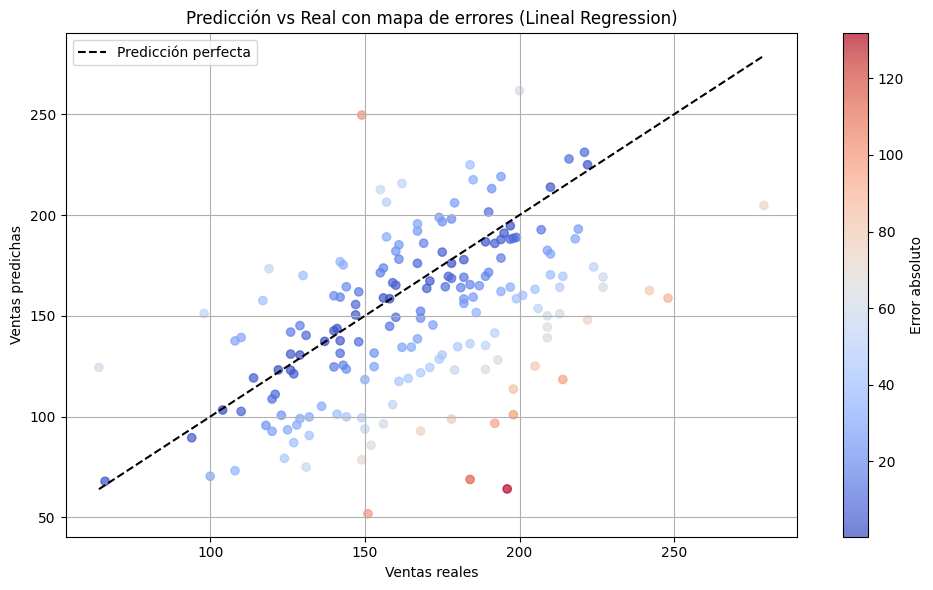

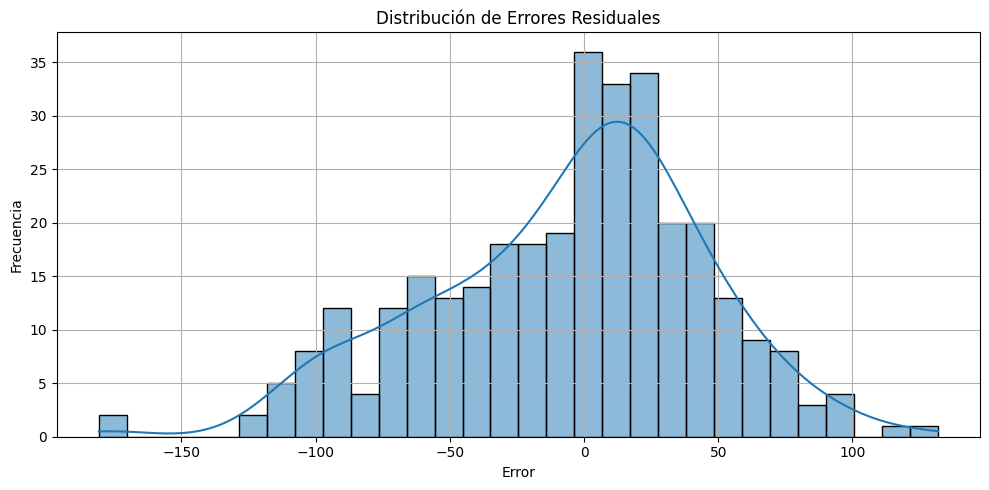

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

df = pd.read_csv("df_final_prueba.csv")
df = df.drop(columns=["date"])
product = "JARRA TROPICAL 0,40"

product_columns = df.columns[36:]
X = df.drop(columns=product_columns)
y = df[[product]]

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# === Entrenar modelo ===
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO ===")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

plt.figure(figsize=(10, 6))

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

mask = (y_test_flat != 0) & (y_pred_flat != 0)
y_test_filtered = y_test_flat[mask]
y_pred_filtered = y_pred_flat[mask]

error_abs = np.abs(y_test_filtered - y_pred_filtered)

scatter = plt.scatter(
    y_test_filtered, y_pred_filtered, c=error_abs, cmap='coolwarm', alpha=0.7
)
plt.plot(
    [y_test_filtered.min(), y_test_filtered.max()],
    [y_test_filtered.min(), y_test_filtered.max()],
    'k--', label='Predicción perfecta'
)
plt.colorbar(scatter, label='Error absoluto')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicción vs Real con mapa de errores (Lineal Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribución de Errores Residuales")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

coef_df = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_[0]
}).sort_values(by="Coeficiente", key=abs, ascending=False)


### RandomForestRegressor

=== MÉTRICAS DEL MODELO (Random Forest) ===
MAE:  18.71
MSE:  935.51
RMSE: 30.59
R²:   0.8761


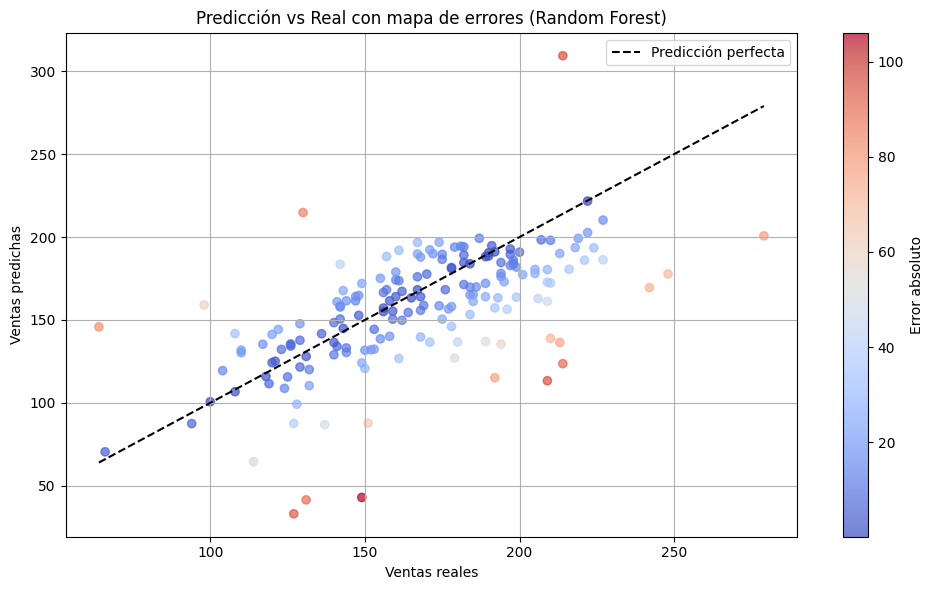

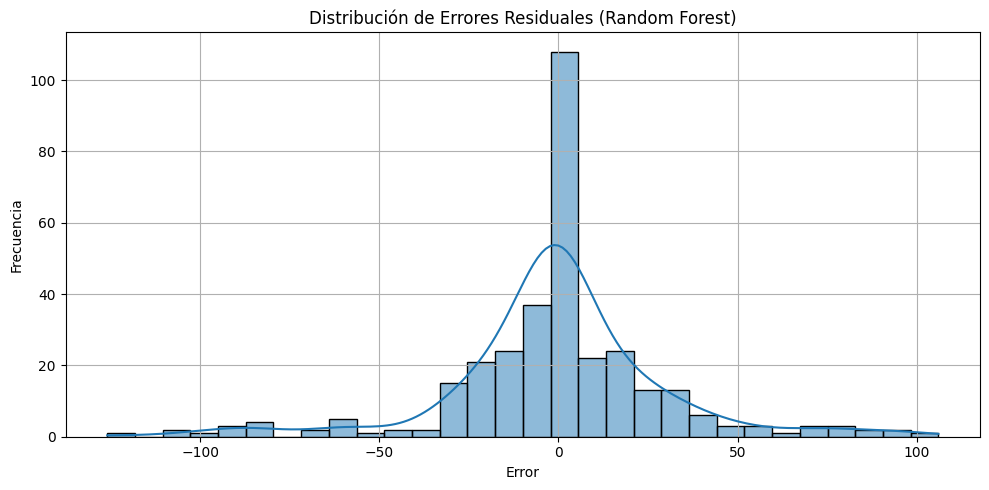


=== VARIABLES MÁS INFLUYENTES ===
      Variable  Importancia
0       adults     0.570503
4   people_GBR     0.107450
3   people_DEU     0.037675
25        tmed     0.028631
28        tmax     0.024187
27        tmin     0.022134
7   people_DNK     0.019469
5   people_ESP     0.017373
13  people_FIN     0.016065
2       babies     0.014833


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("df_final_prueba.csv")
df = df.drop(columns=["date"])
product = "JARRA TROPICAL 0,40"

product_columns = df.columns[36:]
X = df.drop(columns=product_columns)
y = df[[product]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Entrenar modelo ===
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO (Random Forest) ===")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# === Visualización===
plt.figure(figsize=(10, 6))

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

mask = (y_test_flat != 0) & (y_pred_flat != 0)
y_test_filtered = y_test_flat[mask]
y_pred_filtered = y_pred_flat[mask]

error_abs = np.abs(y_test_filtered - y_pred_filtered)

scatter = plt.scatter(
    y_test_filtered, y_pred_filtered, c=error_abs, cmap='coolwarm', alpha=0.7
)
plt.plot(
    [y_test_filtered.min(), y_test_filtered.max()],
    [y_test_filtered.min(), y_test_filtered.max()],
    'k--', label='Predicción perfecta'
)
plt.colorbar(scatter, label='Error absoluto')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicción vs Real con mapa de errores (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribución de Errores Residuales (Random Forest)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

importancia_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\n=== VARIABLES MÁS INFLUYENTES ===")
print(importancia_df.head(10))


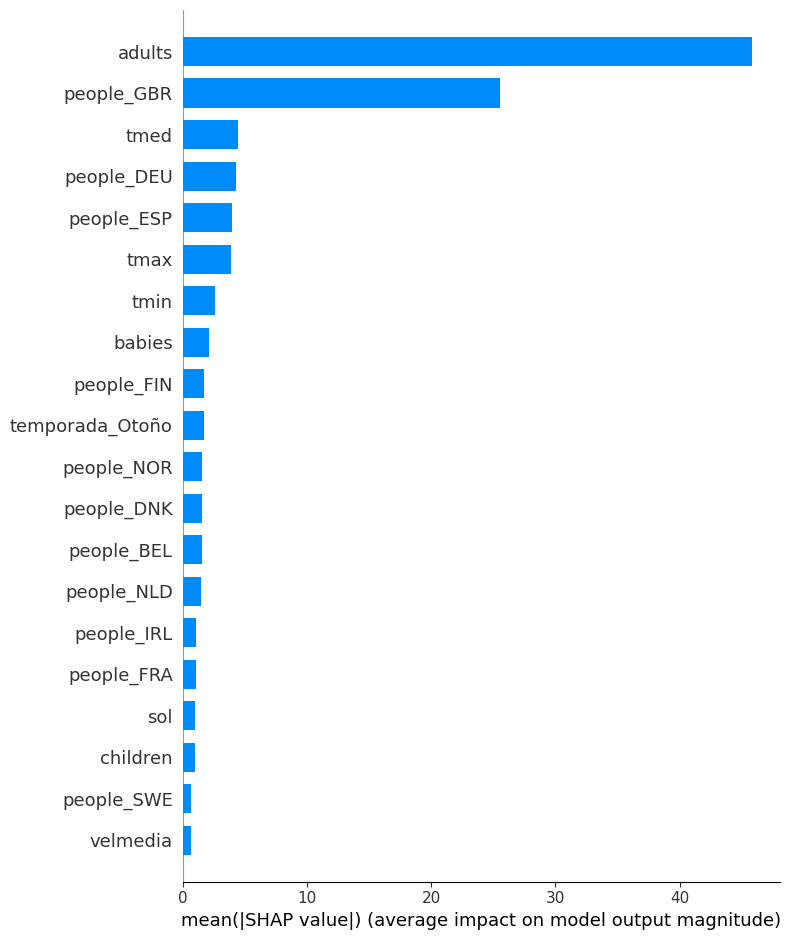

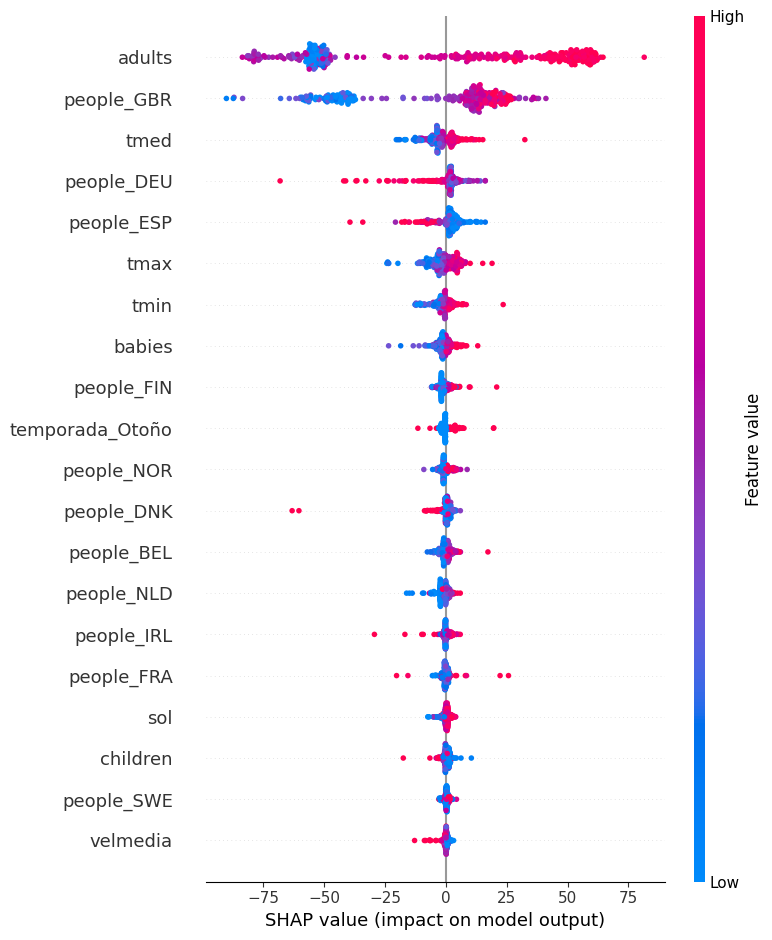

In [7]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), plot_type="bar")

# Gráfico de dispersión SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

### Modelo XGBoost

=== MÉTRICAS DEL MODELO XGBoost ===
MAE:  19.59
MSE:  908.22
RMSE: 30.14
R²:   0.8797


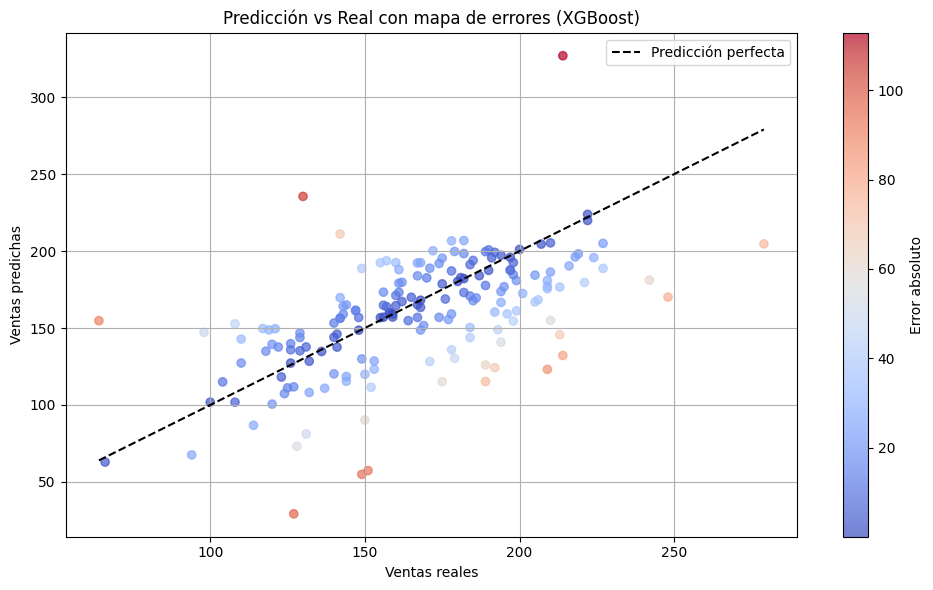


=== VARIABLES MÁS INFLUYENTES SEGÚN XGBoost ===
               Variable  Importancia
0                adults     0.134518
4            people_GBR     0.129761
15      temporada_Otoño     0.066306
12           people_IRL     0.059168
25                 tmed     0.051690
16  temporada_Primavera     0.050399
27                 tmin     0.046508
28                 tmax     0.041585
9            people_SWE     0.034597
10           people_NOR     0.033723


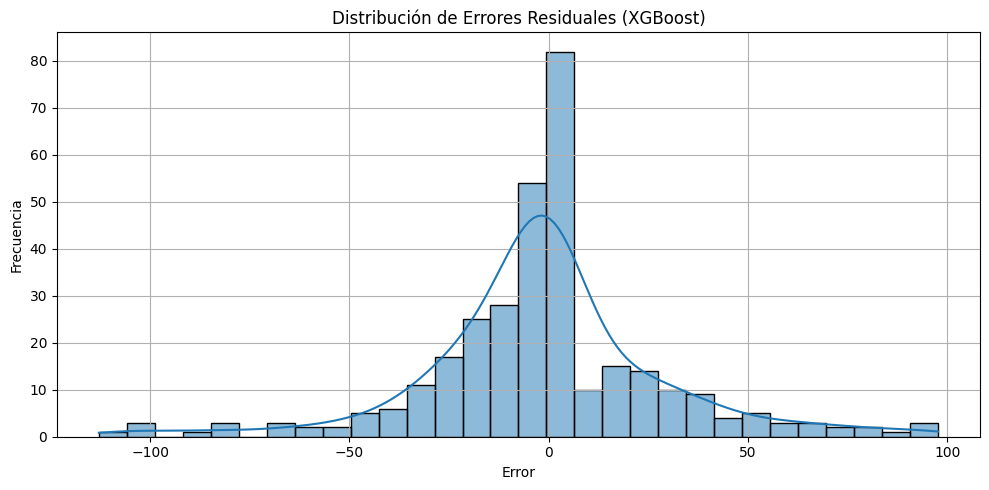

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    mean_absolute_percentage_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

df = pd.read_csv("df_final_prueba.csv")
df = df.drop(columns=["date"])
product = "JARRA TROPICAL 0,40"

product_columns = df.columns[36:]
X = df.drop(columns=product_columns)
y = df[[product]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Entrenar modelo XGBoost ===
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train.values.ravel())

y_pred = xgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO XGBoost ===")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# === Visualización ===
plt.figure(figsize=(10, 6))

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

mask = (y_test_flat != 0) & (y_pred_flat != 0)
y_test_filtered = y_test_flat[mask]
y_pred_filtered = y_pred_flat[mask]

error_abs = np.abs(y_test_filtered - y_pred_filtered)

scatter = plt.scatter(
    y_test_filtered, y_pred_filtered, c=error_abs, cmap='coolwarm', alpha=0.7
)
plt.plot(
    [y_test_filtered.min(), y_test_filtered.max()],
    [y_test_filtered.min(), y_test_filtered.max()],
    'k--', label='Predicción perfecta'
)
plt.colorbar(scatter, label='Error absoluto')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicción vs Real con mapa de errores (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

print("\n=== VARIABLES MÁS INFLUYENTES SEGÚN XGBoost ===")
print(importance_df.head(10))


residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribución de Errores Residuales (XGBoost)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()


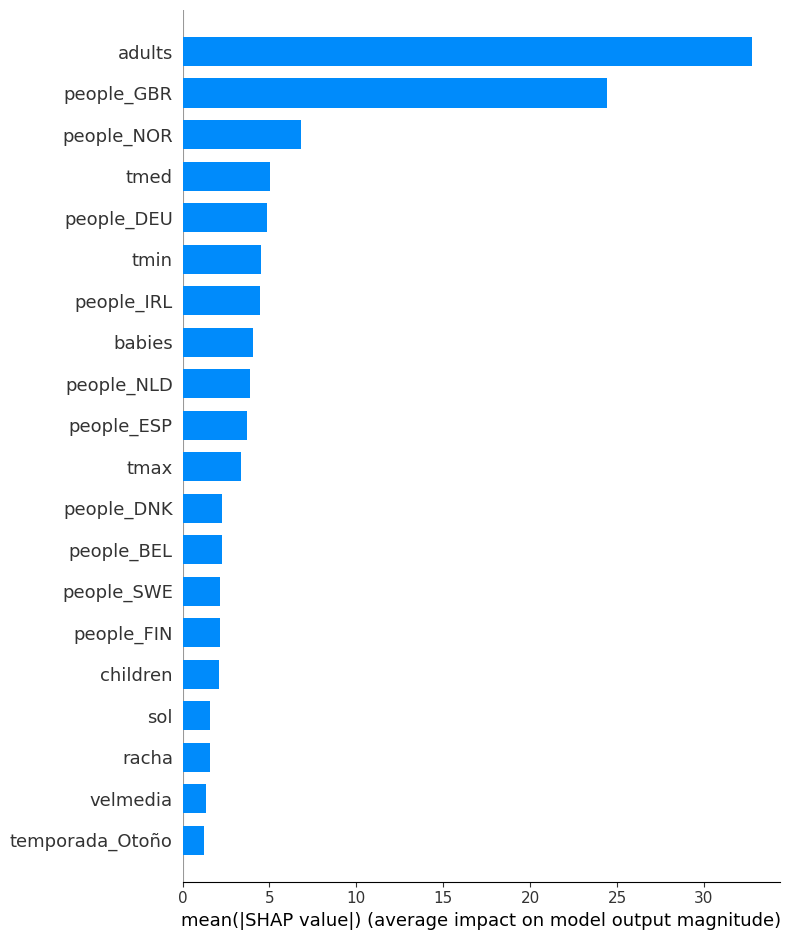

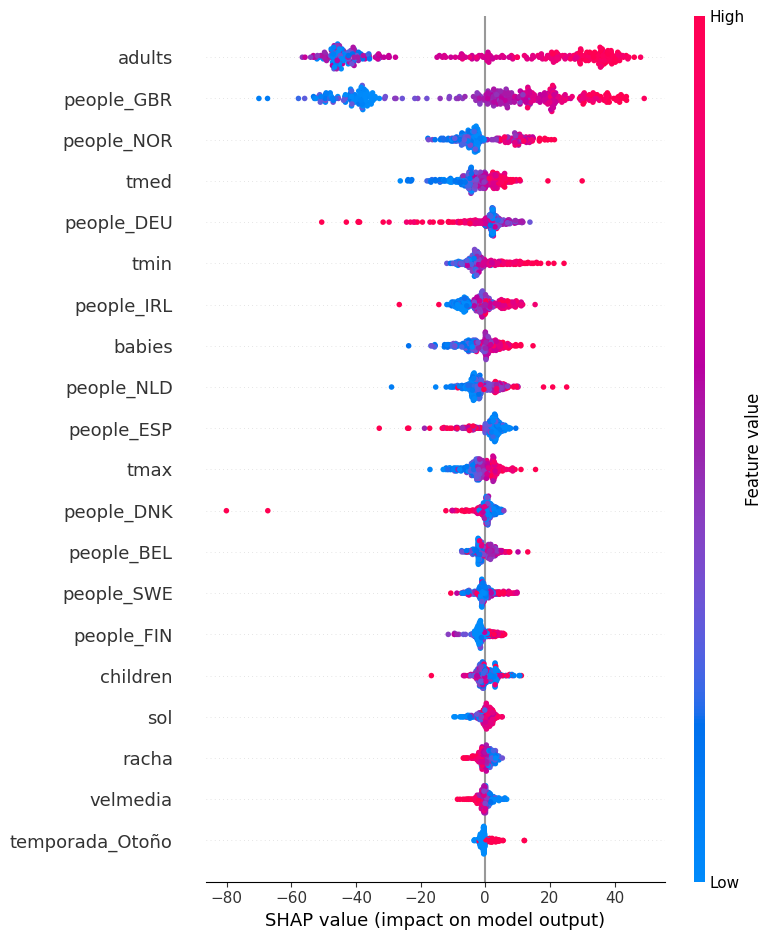

In [8]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist(), plot_type="bar")

# Gráfico de dispersión SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

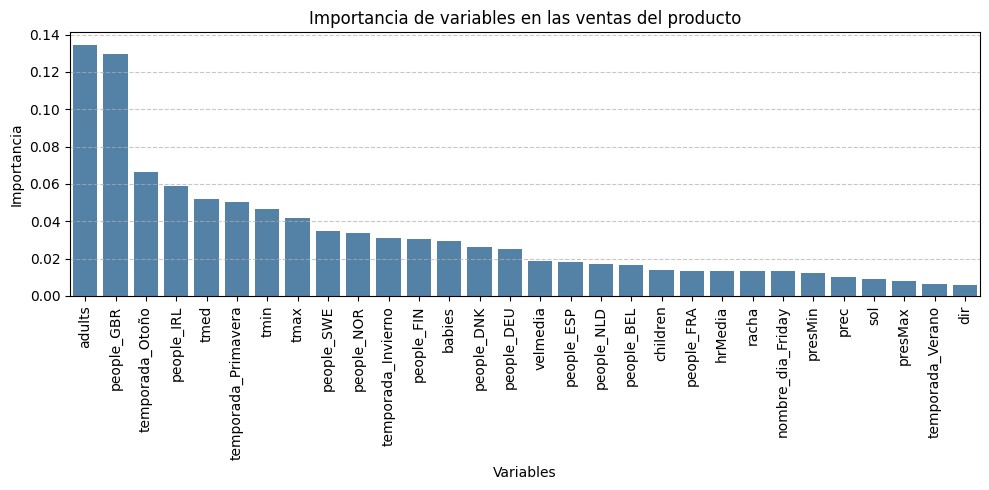

In [13]:
importances = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=importance_df.head(30), 
    x="Variable", y="Importancia", color="steelblue"
)
plt.xticks(rotation=90)
plt.title("Importancia de variables en las ventas del producto")
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Modelo LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2776
[LightGBM] [Info] Number of data points in the train set: 1292, number of used features: 36
[LightGBM] [Info] Start training from score 104.463622
=== MÉTRICAS DEL MODELO LightGBM ===
MAE:  19.27
MSE:  930.07
RMSE: 30.50
R²:   0.8768


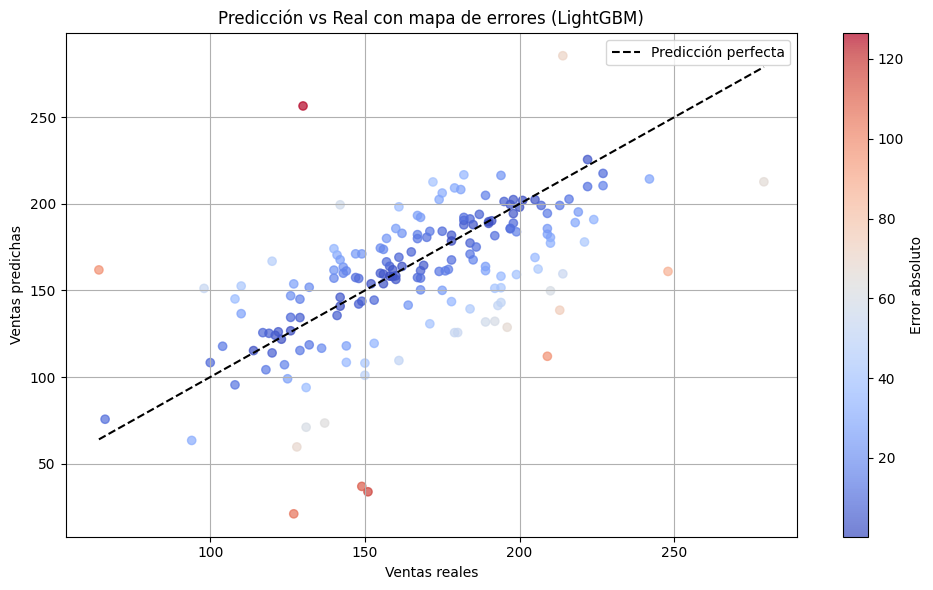


=== VARIABLES MÁS INFLUYENTES SEGÚN LightGBM ===
      Variable  Importancia
4   people_GBR          206
0       adults          199
3   people_DEU          179
7   people_DNK          173
1     children          154
10  people_NOR          153
12  people_IRL          139
28        tmax          136
27        tmin          136
5   people_ESP          132


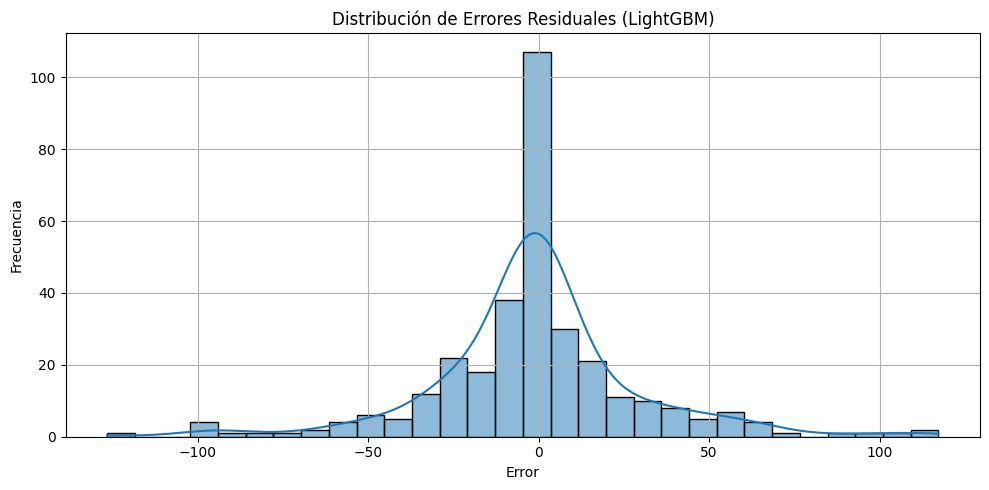

In [9]:
from lightgbm import LGBMRegressor

df = pd.read_csv("df_final_prueba.csv")
df = df.drop(columns=["date"])
product = "JARRA TROPICAL 0,40"

product_columns = df.columns[36:]
X = df.drop(columns=product_columns)
y = df[[product]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Entrenar modelo LightGBM ===
lgb_model = LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train.values.ravel())

y_pred = lgb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DEL MODELO LightGBM ===")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# === Visualización ===
plt.figure(figsize=(10, 6))

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

mask = (y_test_flat != 0) & (y_pred_flat != 0)
y_test_filtered = y_test_flat[mask]
y_pred_filtered = y_pred_flat[mask]

error_abs = np.abs(y_test_filtered - y_pred_filtered)

scatter = plt.scatter(
    y_test_filtered, y_pred_filtered, c=error_abs, cmap='coolwarm', alpha=0.7
)
plt.plot(
    [y_test_filtered.min(), y_test_filtered.max()],
    [y_test_filtered.min(), y_test_filtered.max()],
    'k--', label='Predicción perfecta'
)
plt.colorbar(scatter, label='Error absoluto')
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Predicción vs Real con mapa de errores (LightGBM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": lgb_model.feature_importances_
}).sort_values(by="Importancia", ascending=False)

print("\n=== VARIABLES MÁS INFLUYENTES SEGÚN LightGBM ===")
print(importance_df.head(10))

residuals = y_test.values.flatten() - y_pred.flatten()
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribución de Errores Residuales (LightGBM)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

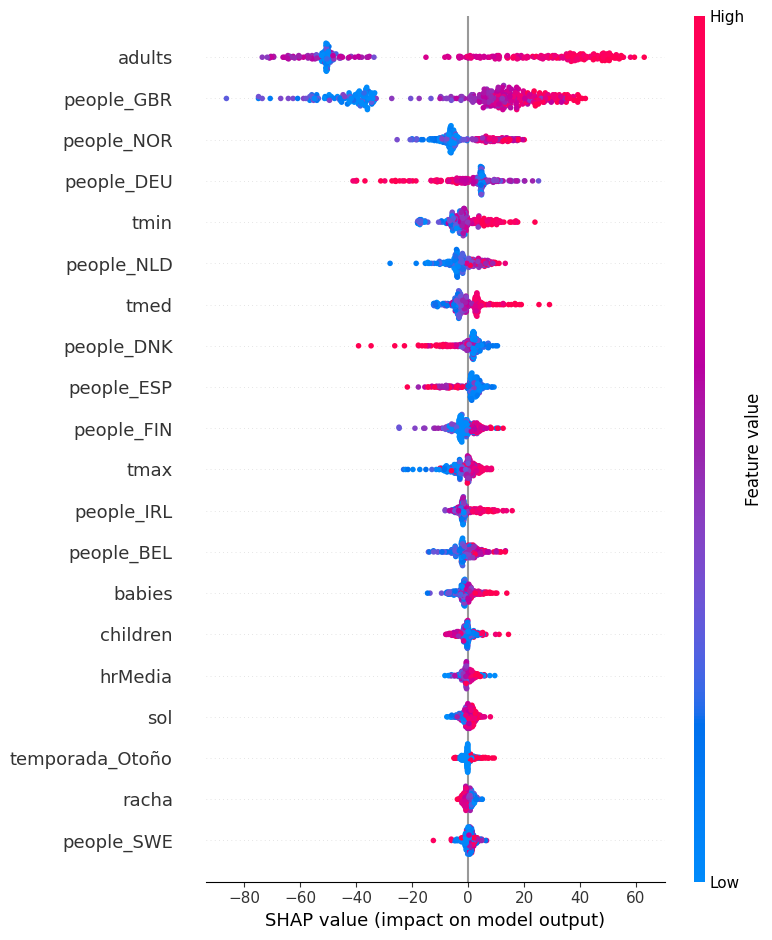

In [12]:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_test)

# Gráfico de dispersión SHAP
shap.summary_plot(shap_values, X_test, feature_names=X.columns.tolist())

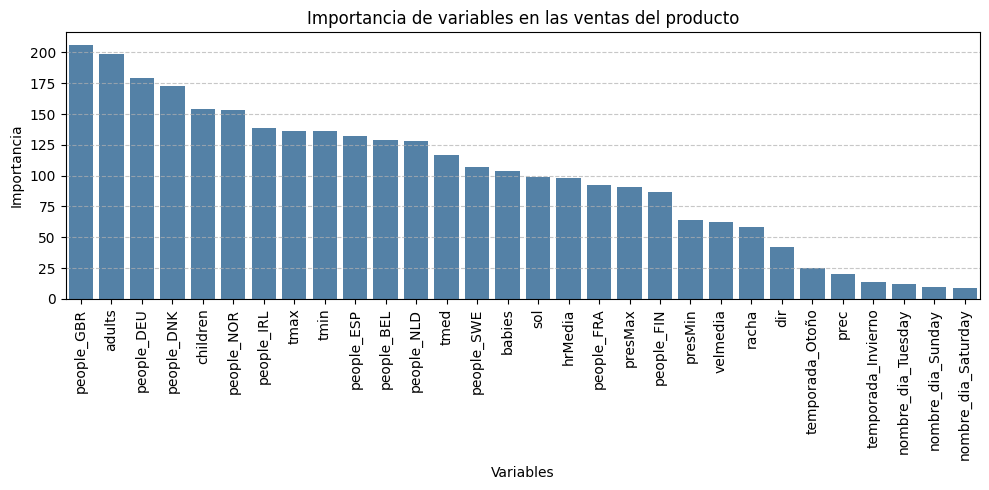

In [11]:
# Obtener importancias
importances = lgb_model.feature_importances_
importance_df = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": importances
}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=importance_df.head(30),
    x="Variable", y="Importancia", color="steelblue"
)
plt.xticks(rotation=90)
plt.title("Importancia de variables en las ventas del producto")
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Red neuronal multicapa con activación Relu

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.express as px

df = pd.read_csv("df_final_prueba.csv")
df = df.drop(columns=["date"])
producto = "JARRA TROPICAL 0,40"

q1, q3 = df[producto].quantile([0.25, 0.75])
iqr = q3 - q1
df = df[(df[producto] >= q1 - 1.5 * iqr) & (df[producto] <= q3 + 1.5 * iqr)]

product_columns = df.columns[36:]
X = df.drop(columns=product_columns)
y = df[[producto]]

selector = SelectKBest(score_func=f_regression, k=20)
X_selected = selector.fit_transform(X, y.values.ravel())
selected_features = X.columns[selector.get_support()]

scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X[selected_features])
scaler_y = RobustScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32)

X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# === Definir red neuronal MLP ===
class MLP(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

model = MLP(X_train_tensor.shape[1])
optimizer = optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

best_r2 = -np.inf
patience = 20
trigger_times = 0

for epoch in range(300):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_test_tensor).numpy()
        y_pred_inv = scaler_y.inverse_transform(y_pred_val)
        y_true_inv = scaler_y.inverse_transform(y_test_tensor.numpy())
        current_r2 = r2_score(y_true_inv, y_pred_inv)

        if current_r2 > best_r2:
            best_r2 = current_r2
            best_model_state = model.state_dict().copy()
            trigger_times = 0
        else:
            trigger_times += 1

    if trigger_times >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# === Evaluación final ===
model.load_state_dict(best_model_state)
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_true_inv = scaler_y.inverse_transform(y_test_tensor.numpy())
    r2_mlp = r2_score(y_true_inv, y_pred_inv)
    print(f"R² final del modelo MLP: {r2_mlp:.4f}")

input_weights = model.model[0].weight.detach().numpy()
input_importance_df = pd.DataFrame({
    "Variable": selected_features,
    "Importancia": np.abs(input_weights).mean(axis=0)
}).sort_values(by="Importancia", ascending=False)

Early stopping at epoch 117
R² final del modelo MLP: 0.9292


=== MÉTRICAS DEL MODELO Red Neuronal ===
MAE:  14.17
MSE:  534.64
RMSE: 23.12
R²:   0.9292


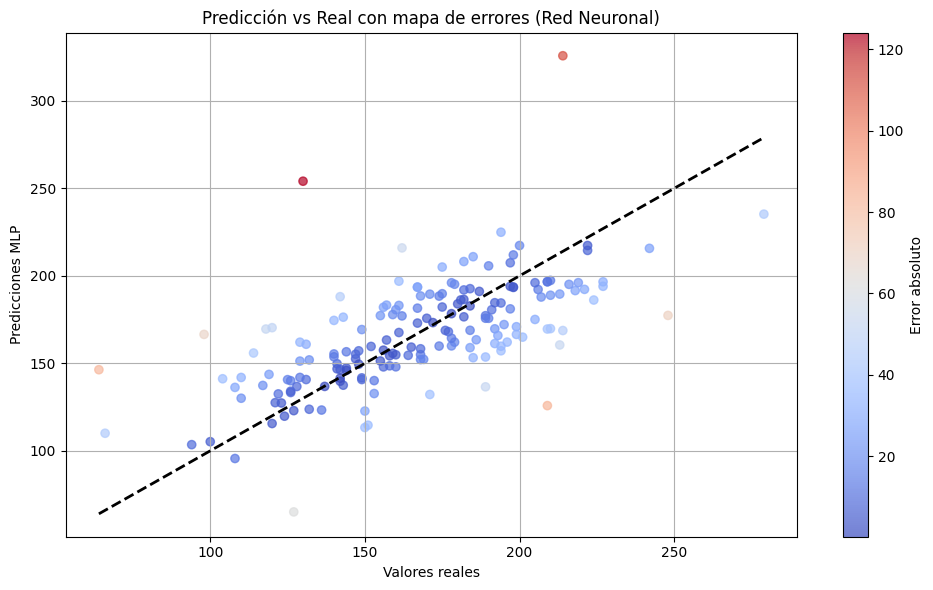

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

mae_mlp = mean_absolute_error(y_true_inv, y_pred_inv)
mse_mlp = mean_squared_error(y_true_inv, y_pred_inv)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_true_inv, y_pred_inv)

print("=== MÉTRICAS DEL MODELO Red Neuronal ===")
print(f"MAE:  {mae_mlp:.2f}")
print(f"MSE:  {mse_mlp:.2f}")
print(f"RMSE: {rmse_mlp:.2f}")
print(f"R²:   {r2_mlp:.4f}")

errors = np.abs(y_pred_inv.flatten() - y_true_inv.flatten())

mask = ~((y_pred_inv.flatten() == 0) | (y_true_inv.flatten() == 0))

y_true_filtered = y_true_inv.flatten()[mask]
y_pred_filtered = y_pred_inv.flatten()[mask]
errors_filtered = errors[mask]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    y_true_filtered,
    y_pred_filtered,
    c=errors_filtered,
    cmap='coolwarm',
    alpha=0.7
)
plt.plot(
    [y_true_filtered.min(), y_true_filtered.max()],
    [y_true_filtered.min(), y_true_filtered.max()],
    'k--', lw=2
)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones MLP")
plt.title("Predicción vs Real con mapa de errores (Red Neuronal)")
plt.colorbar(scatter, label="Error absoluto")
plt.grid(True)
plt.tight_layout()
plt.show()

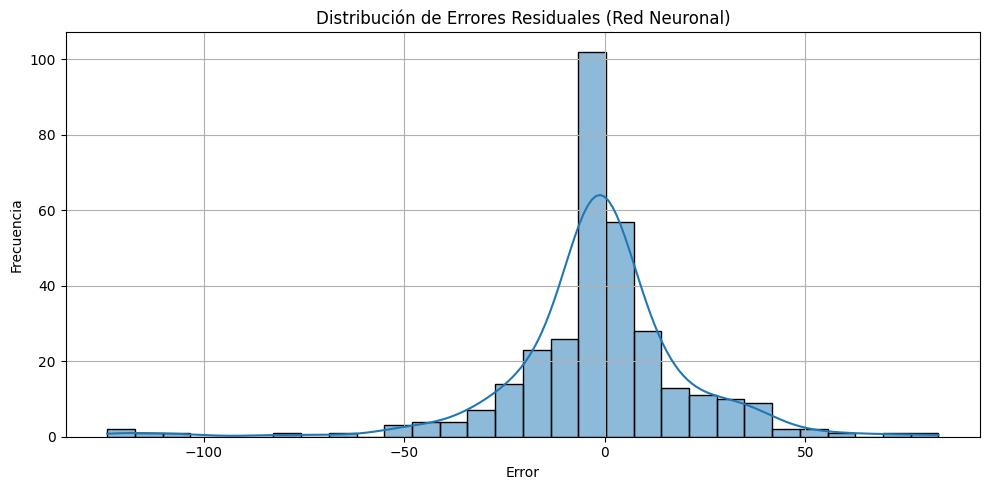

In [17]:
residuos = y_true_inv.flatten() - y_pred_inv.flatten()

plt.figure(figsize=(10, 5))
sns.histplot(residuos, kde=True, bins=30)
plt.title("Distribución de Errores Residuales (Red Neuronal)")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()

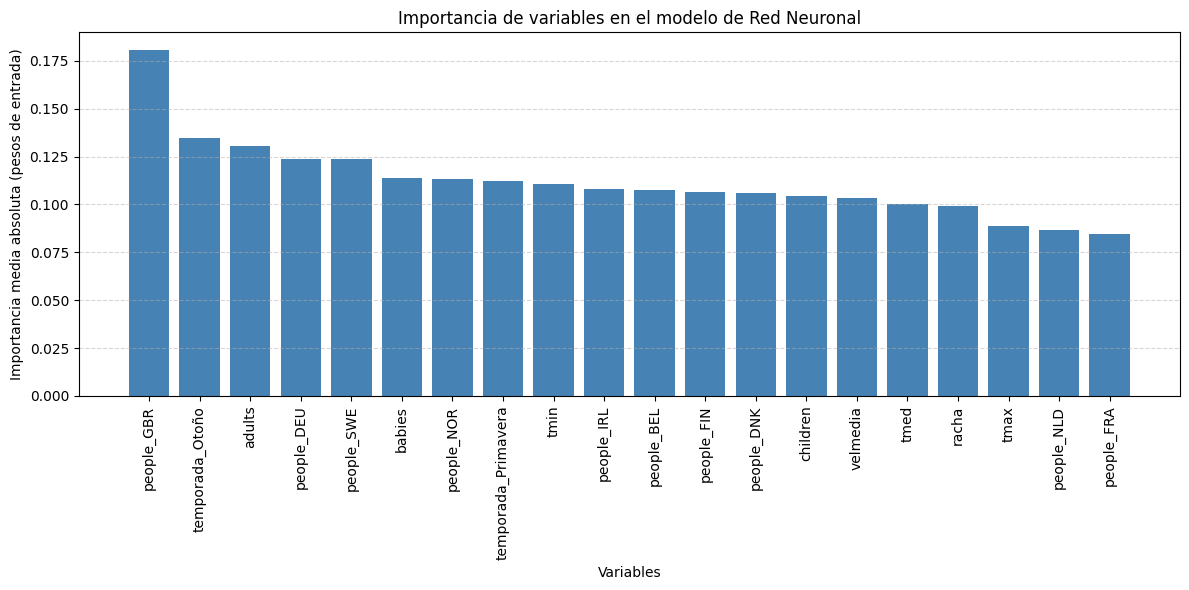

In [18]:
import matplotlib.pyplot as plt

# Ordenar por importancia
input_importance_df_sorted = input_importance_df.sort_values(by="Importancia", ascending=False)

# Gráfico en formato horizontal (barras verticales)
plt.figure(figsize=(12, 6))
plt.bar(input_importance_df_sorted["Variable"], input_importance_df_sorted["Importancia"], color='steelblue')
plt.xticks(rotation=90)
plt.title("Importancia de variables en el modelo de Red Neuronal")
plt.xlabel("Variables")
plt.ylabel("Importancia media absoluta (pesos de entrada)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

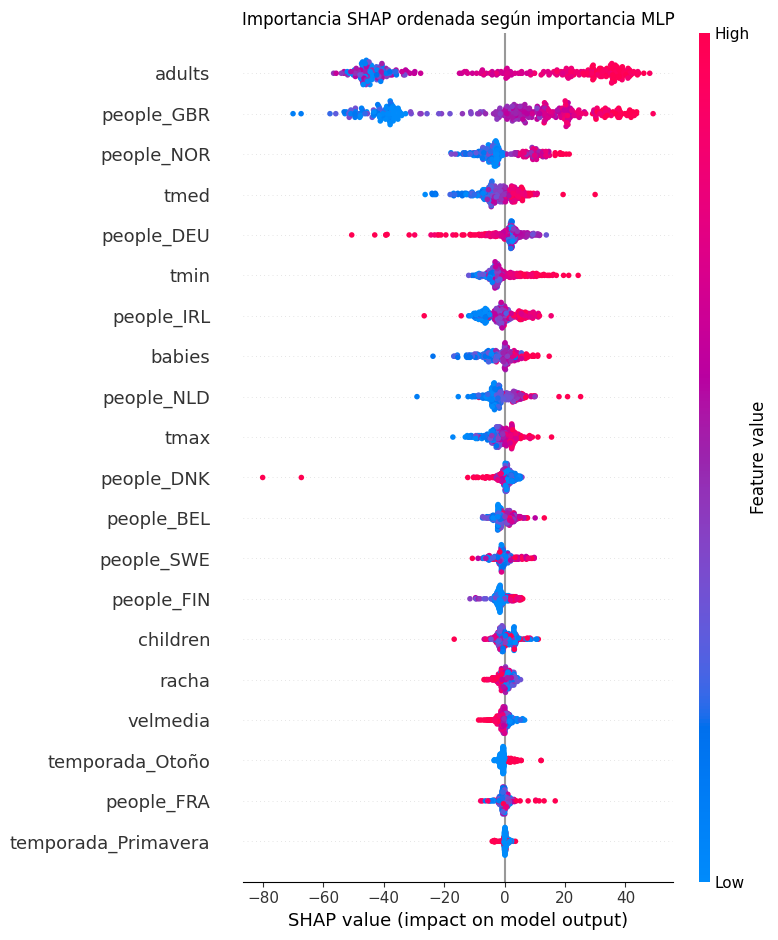

In [19]:
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test)

orden_mlp = input_importance_df_sorted["Variable"].tolist()
orden_mlp_filtrado = [col for col in orden_mlp if col in X_test.columns]

X_test_ordered = X_test[orden_mlp_filtrado].astype(float)

column_indices = [X_test.columns.get_loc(col) for col in orden_mlp_filtrado]
shap_values_reordered = shap_values_xgb[:, column_indices]

fig, ax = plt.subplots(figsize=(12, 6))
shap.summary_plot(shap_values_reordered, X_test_ordered, show=False)

plt.title("Importancia SHAP ordenada según importancia MLP")
plt.tight_layout()
plt.show()

In [22]:
media_ventas = 151.96
mae_mlp = mean_absolute_error(y_true_inv, y_pred_inv)

porcentaje_error_medio = (mae_mlp / media_ventas) * 100

print(f"MAE del modelo: {mae_mlp:.2f}")
print(f"Porcentaje de error medio relativo: {porcentaje_error_medio:.2f}%")

MAE del modelo: 14.17
Porcentaje de error medio relativo: 9.33%
